In [70]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
import shutil
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [44]:
ImagePATH = f"images/"
categories = glob(ImagePATH+"*")

In [45]:
print(categories)

['images\\chinese', 'images\\japanese', 'images\\korean']


In [48]:
filedf = pd.DataFrame()
for cat in categories:
    files = glob(cat+"/*")
    tempdf = pd.DataFrame({'filepath':files,'category':cat.split("\\")[-1]})
    filedf = pd.concat([filedf,tempdf])

In [49]:
filedf.head()

,filepath,category
0,images\chinese\(Stella)Jiale Shen.jpg,chinese
1,images\chinese\Aaron Rockwell.jpg,chinese
2,images\chinese\Abby Huang.jpg,chinese
3,images\chinese\Abhishek Kundu.jpg,chinese
4,images\chinese\Abraham Abdul Adenle.jpg,chinese


In [50]:
gby_cnt = filedf.groupby("category").aggregate('count').rename(columns = {'filepath':'cnt'}).reset_index().sort_values(by='cnt',ascending=False)

In [51]:
mkdir outputs

A subdirectory or file outputs already exists.


In [52]:
gby_cnt.to_csv(f"outputs/category_counts.csv",index=None)

# Image check - sample

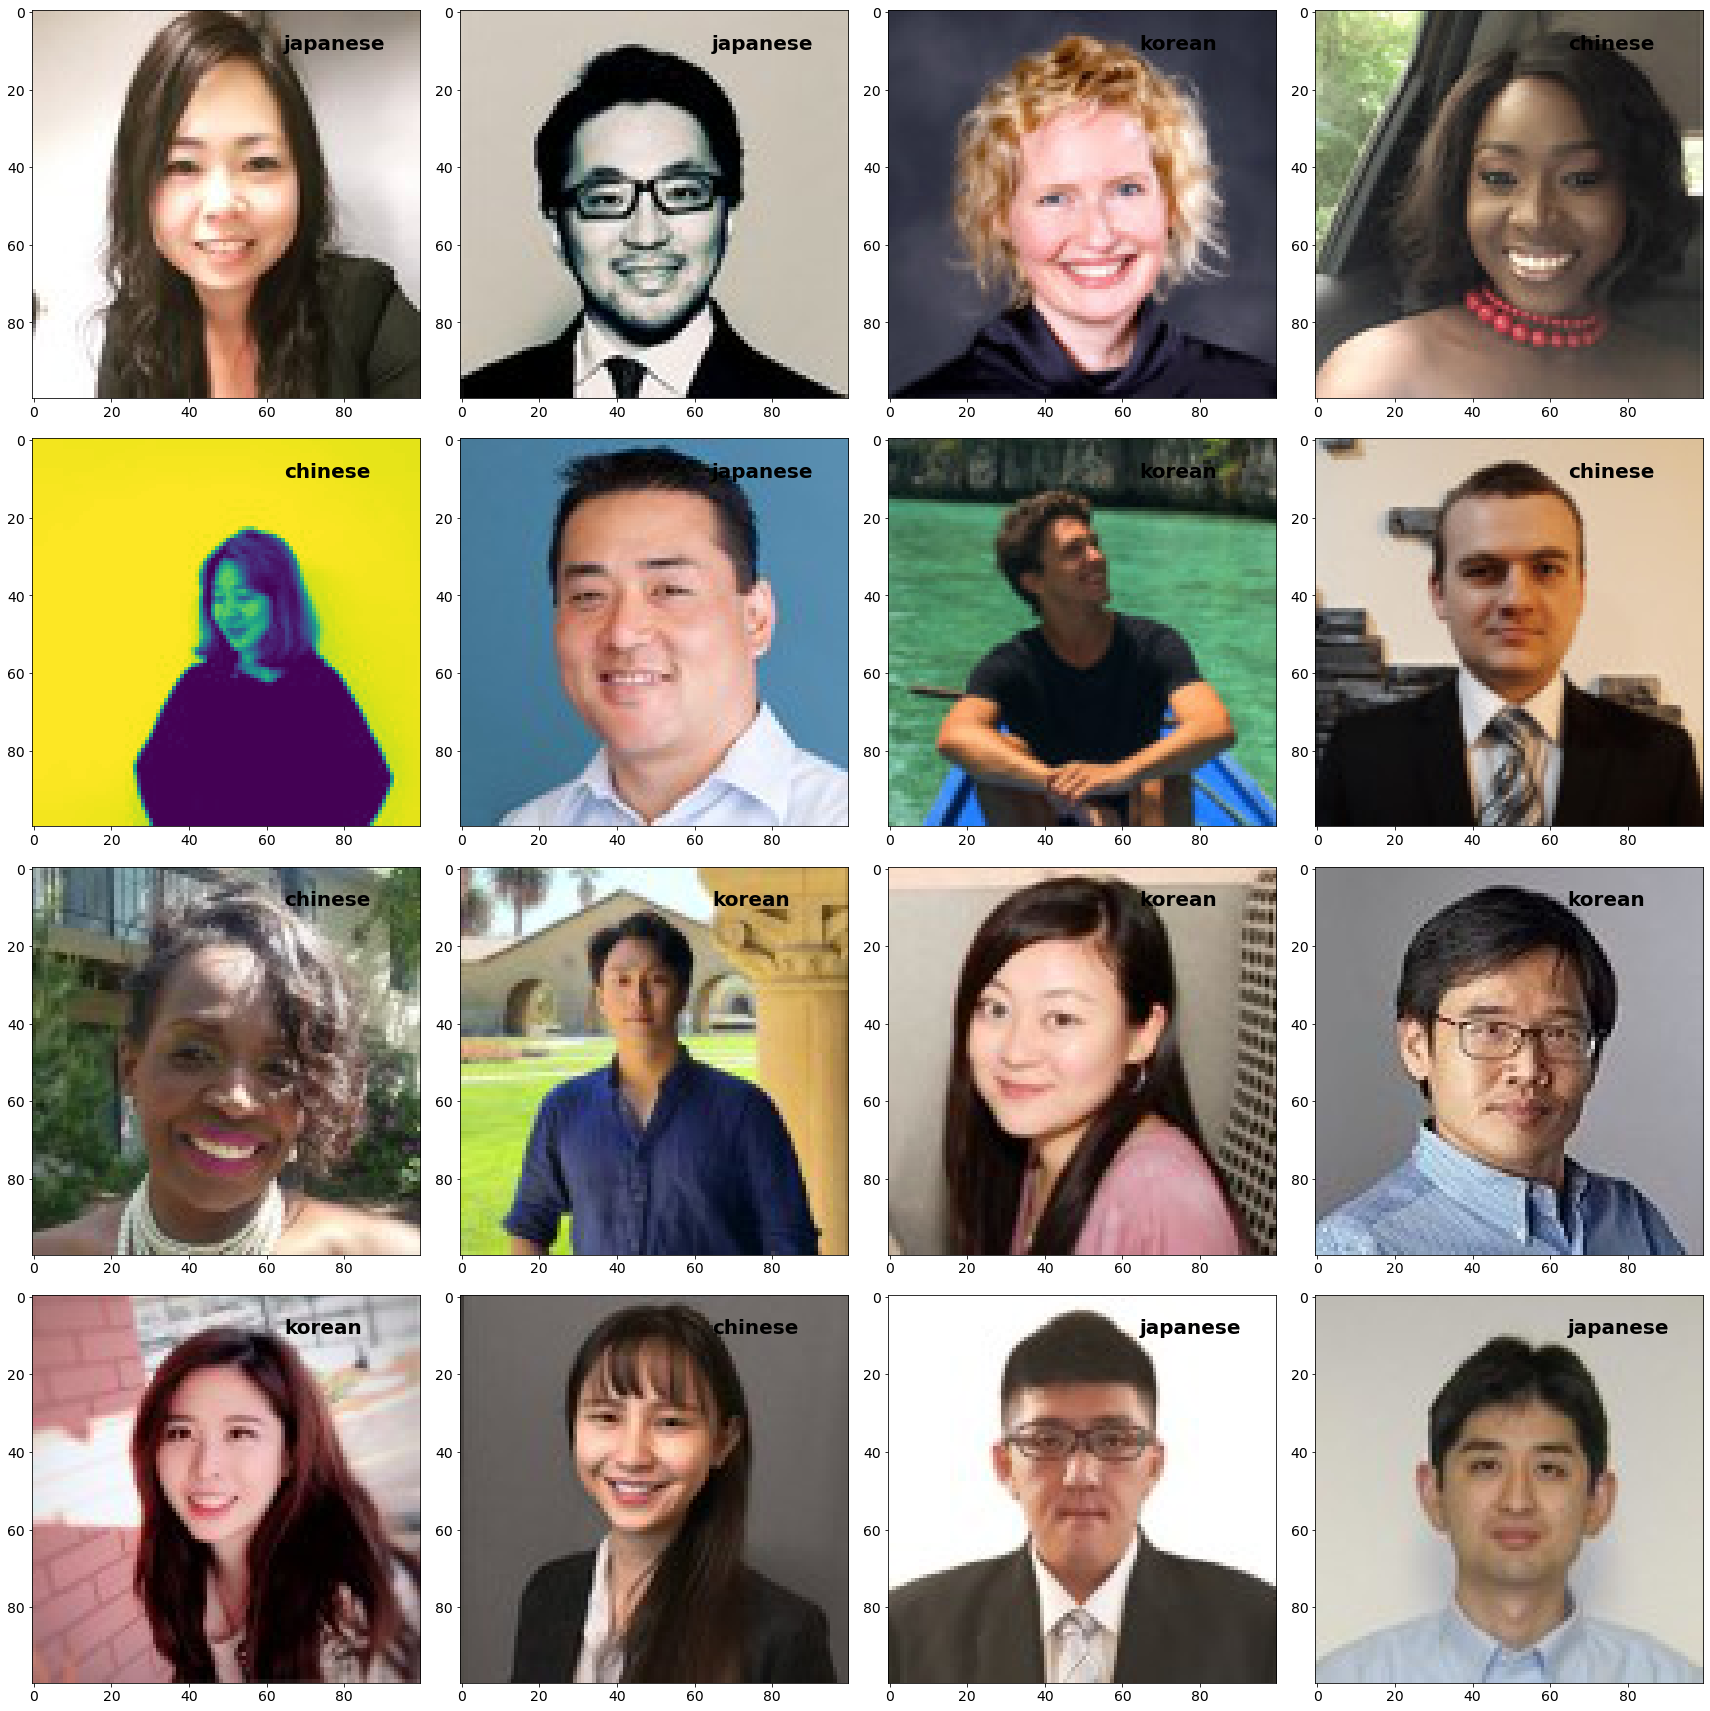

In [53]:
plt.figure(figsize=(24, 24))

for i in range(16):
    path = filedf.sample(1)['filepath'].values[0]
    category = path.split("\\")[1]
    ex_img = Image.open(path)
    ax = plt.subplot(4, 4, i + 1)
    ax.annotate(category, xy=(0.65, 0.9), xycoords="axes fraction",weight='bold',size=20)
    ax.imshow(ex_img)

plt.tight_layout()

# Train/Test/Val

In [54]:
X_train, X_test, _, _ = train_test_split(
        filedf, filedf['category'],stratify=filedf['category'], test_size=0.4)

X_test, X_val, _, _ = train_test_split(
        X_test, X_test['category'], stratify=X_test['category'], test_size=0.5)

In [55]:
X_train['type'] = 'train'
X_val['type'] = 'val'
X_test['type'] = 'test'

<ipython-input-55-27ac73f13727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['type'] = 'train'


In [56]:
fulldf = pd.concat([X_train,X_test,X_val])

In [57]:
fulldf.type.value_counts()

train    2575
val       859
test      858
Name: type, dtype: int64

In [58]:
fulldf.head()

,filepath,category,type
1337,images\korean\John Ko_a_vFNDvy-OZvNgpAYHveaWR8...,korean,train
876,images\chinese\Qian Wang.jpg,chinese,train
850,images\japanese\anonymous_a_s9kc85IUTo3sbnUire...,japanese,train
972,images\korean\anonymous_a_SaVmjdc6Wts7dRFqRWqT...,korean,train
759,images\korean\anonymous_a_mSuEoApGBG5IgEBnXYcY...,korean,train


# Create folder structure for Torch

In [59]:
fulldf.category.unique()

array(['korean', 'chinese', 'japanese'], dtype=object)

In [65]:
!mkdir data

A subdirectory or file data already exists.


In [67]:
for cat in fulldf.category.unique():
    #os.system(f"mkdir data/train/'{cat}'") 
    #os.system(f"mkdir data/test/'{cat}'") 
    #os.system(f"mkdir data/val/'{cat}'")
    try:
        os.makedirs("data/train/"+cat)
    except: pass
    try:
        os.makedirs("data/test/"+cat)
    except: pass
    try:
        os.makedirs("data/val/"+cat)
    except: pass

In [72]:
# Copy files
for i,row in fulldf.iterrows():
    # ethnicity
    cat = row['category']
    # section is train,val or test
    section = row['type']
    # input filepath to copy
    ipath = row['filepath']
    # output filepath to paste
    # opath = ipath.replace(f"images/",f"data/{section}/")
    # running the cp command
    # os.system(f"cp '{ipath}' '{opath}'")
    shutil.copy(ipath, 'data/'+section+'/'+cat)